In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [29]:
df=pd.read_csv('D:\DSP\sonar_dataset.csv',header=None)

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [31]:
df[50].value_counts()

0.0125    4
0.0154    4
0.0104    3
0.0137    3
0.0140    3
         ..
0.0047    1
0.0025    1
0.0019    1
0.0018    1
0.0042    1
Name: 50, Length: 160, dtype: int64

In [32]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [9]:
x=df.drop(60,axis=1)
y=df[60]

In [10]:
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

In [33]:
y=pd.get_dummies(data=df,columns=[60],drop_first=True)

In [34]:
y.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60_R
62,0.0086,0.0215,0.0242,0.0445,0.0667,0.0771,0.0499,0.0906,0.1229,0.1185,...,0.0072,0.0054,0.0022,0.0016,0.0029,0.0058,0.0050,0.0024,0.0030,1
175,0.0294,0.0123,0.0117,0.0113,0.0497,0.0998,0.1326,0.1117,0.2984,0.3473,...,0.0056,0.0104,0.0079,0.0014,0.0054,0.0015,0.0006,0.0081,0.0043,0
86,0.0188,0.0370,0.0953,0.0824,0.0249,0.0488,0.1424,0.1972,0.1873,0.1806,...,0.0093,0.0033,0.0113,0.0030,0.0057,0.0090,0.0057,0.0068,0.0024,1
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
103,0.0162,0.0253,0.0262,0.0386,0.0645,0.0472,0.1056,0.1388,0.0598,0.1334,...,0.0071,0.0082,0.0232,0.0198,0.0074,0.0035,0.0100,0.0048,0.0019,0


In [35]:
df=y.copy()

In [36]:
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60_R
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [37]:
x=df.drop('60_R',axis=1)
y=df['60_R']

In [38]:
y.value_counts()

0    111
1     97
Name: 60_R, dtype: int64

In [39]:
y.sample(5)

147    0
191    0
35     1
182    0
27     1
Name: 60_R, dtype: uint8

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [42]:
x_train.shape

(166, 60)

In [43]:
x_test.shape

(42, 60)

In [44]:
y_train.shape

(166,)

In [45]:
y_test.shape

(42,)

In [46]:
model=keras.Sequential([keras.layers.Dense(60,input_dim=60,activation='relu'),
                       keras.layers.Dense(30,activation='relu'),
                       keras.layers.Dense(15,activation='relu'),
                       keras.layers.Dense(1,activation='sigmoid')])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
21/21 [==============================] - 1s 763us/step - loss: 0.6764 - accuracy: 0.5663
Epoch 2/100
21/21 [==============================] - 0s 748us/step - loss: 0.6593 - accuracy: 0.5663
Epoch 3/100
21/21 [==============================] - 0s 748us/step - loss: 0.6432 - accuracy: 0.6145
Epoch 4/100
21/21 [==============================] - 0s 798us/step - loss: 0.6187 - accuracy: 0.6807
Epoch 5/100
21/21 [==============================] - 0s 898us/step - loss: 0.5947 - accuracy: 0.6687
Epoch 6/100
21/21 [==============================] - 0s 848us/step - loss: 0.5716 - accuracy: 0.7229
Epoch 7/100
21/21 [==============================] - 0s 748us/step - loss: 0.5455 - accuracy: 0.7952
Epoch 8/100
21/21 [==============================] - 0s 748us/step - loss: 0.5025 - accuracy: 0.8012
Epoch 9/100
21/21 [==============================] - 0s 748us/step - loss: 0.4733 - accuracy: 0.7771
Epoch 10/100
21/21 [==============================] - 0s 748us/step - loss: 0.4415 - accura

21/21 [==============================] - 0s 729us/step - loss: 0.0118 - accuracy: 1.0000
Epoch 82/100
21/21 [==============================] - 0s 698us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 83/100
21/21 [==============================] - 0s 748us/step - loss: 0.0095 - accuracy: 1.0000
Epoch 84/100
21/21 [==============================] - 0s 698us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 85/100
21/21 [==============================] - 0s 698us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 86/100
21/21 [==============================] - 0s 698us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 87/100
21/21 [==============================] - 0s 748us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 88/100
21/21 [==============================] - 0s 698us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 89/100
21/21 [==============================] - 0s 698us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 90/100
21/21 [==============================] - 0s 698us/step - loss: 0.0103 - accuracy: 

In [47]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 1.4429 - accuracy: 0.7619


[1.4428755044937134, 0.761904776096344]

In [50]:
y_pred=model.predict(x_test).reshape(-1)

2/2 [==============================] - 0s 999us/step


In [51]:
y_pred[:5]

array([4.0474606e-09, 9.9259591e-01, 9.8631454e-01, 2.6751904e-05,
       9.9999577e-01], dtype=float32)

In [52]:
y_pred1=np.round(y_pred)

In [53]:
y_pred1

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0.], dtype=float32)

In [54]:
y_pred[:5]

array([4.0474606e-09, 9.9259591e-01, 9.8631454e-01, 2.6751904e-05,
       9.9999577e-01], dtype=float32)

In [57]:
y_pred1[:10]

array([0., 1., 1., 0., 1., 1., 0., 1., 0., 1.], dtype=float32)

In [58]:
y_test[:10]

186    0
155    0
165    0
200    0
58     1
34     1
151    0
18     1
202    0
62     1
Name: 60_R, dtype: uint8

In [59]:
from sklearn.metrics import confusion_matrix,classification_report


In [61]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.83      0.68      0.75        22

    accuracy                           0.76        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.77      0.76      0.76        42



In [63]:
import math
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

In [64]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20,  0],
       [22,  0]])>

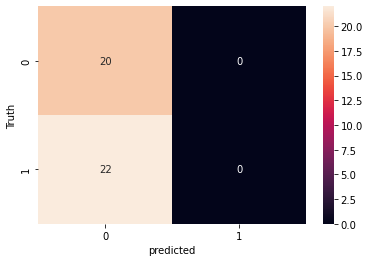

In [66]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.show()

In [67]:
#By using Dropout Regularization how my model is performing:
modeld=keras.Sequential([keras.layers.Dense(60,input_dim=60,activation='relu'),
                        keras.layers.Dropout(0.5),
                       keras.layers.Dense(30,activation='relu'),
                        keras.layers.Dropout(0.5),
                       keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dropout(0.5),
                       keras.layers.Dense(1,activation='sigmoid')])
modeld.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
modeld.fit(x_train,y_train,epochs=100,batch_size=8)

Epoch 1/100
21/21 [==============================] - 0s 997us/step - loss: 0.7348 - accuracy: 0.5000
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7237 - accuracy: 0.4699
Epoch 3/100
21/21 [==============================] - 0s 798us/step - loss: 0.6927 - accuracy: 0.5301
Epoch 4/100
21/21 [==============================] - 0s 848us/step - loss: 0.7016 - accuracy: 0.5000
Epoch 5/100
21/21 [==============================] - 0s 823us/step - loss: 0.6819 - accuracy: 0.5904
Epoch 6/100
21/21 [==============================] - 0s 829us/step - loss: 0.6855 - accuracy: 0.5361
Epoch 7/100
21/21 [==============================] - 0s 848us/step - loss: 0.6825 - accuracy: 0.5482
Epoch 8/100
21/21 [==============================] - 0s 848us/step - loss: 0.6954 - accuracy: 0.5000
Epoch 9/100
21/21 [==============================] - 0s 798us/step - loss: 0.6975 - accuracy: 0.4880
Epoch 10/100
21/21 [==============================] - 0s 798us/step - loss: 0.6716 - accuracy

21/21 [==============================] - 0s 748us/step - loss: 0.3271 - accuracy: 0.8614
Epoch 82/100
21/21 [==============================] - 0s 798us/step - loss: 0.3109 - accuracy: 0.8735
Epoch 83/100
21/21 [==============================] - 0s 789us/step - loss: 0.3384 - accuracy: 0.8675
Epoch 84/100
21/21 [==============================] - 0s 798us/step - loss: 0.3494 - accuracy: 0.8554
Epoch 85/100
21/21 [==============================] - 0s 748us/step - loss: 0.3285 - accuracy: 0.9036
Epoch 86/100
21/21 [==============================] - 0s 748us/step - loss: 0.3066 - accuracy: 0.8735
Epoch 87/100
21/21 [==============================] - 0s 748us/step - loss: 0.3527 - accuracy: 0.8735
Epoch 88/100
21/21 [==============================] - 0s 798us/step - loss: 0.3501 - accuracy: 0.8313
Epoch 89/100
21/21 [==============================] - 0s 748us/step - loss: 0.3014 - accuracy: 0.8855
Epoch 90/100
21/21 [==============================] - 0s 748us/step - loss: 0.2992 - accuracy: 

In [68]:
modeld.evaluate(x_test,y_test)

2/2 [==============================] - 0s 997us/step - loss: 0.4504 - accuracy: 0.8333


[0.45037218928337097, 0.8333333134651184]

In [69]:
y_pred2=modeld.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [70]:
y_pred3=np.round(y_pred2)

In [72]:
y_pred3[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [73]:
y_test[:10]

186    0
155    0
165    0
200    0
58     1
34     1
151    0
18     1
202    0
62     1
Name: 60_R, dtype: uint8

In [76]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        20
           1       0.94      0.73      0.82        22

    accuracy                           0.83        42
   macro avg       0.85      0.84      0.83        42
weighted avg       0.85      0.83      0.83        42



In [77]:
import math
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred3)

In [78]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[19,  1],
       [ 6, 16]])>